            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

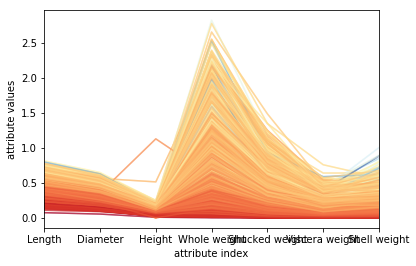

In [4]:
# parallel plot
import pandas as pd
import numpy as np
from math import exp
import matplotlib.pyplot as plot
#from pylab import *
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(target_url,header=None,prefix="V")
abalone.columns = ['sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
summary = abalone.describe()
print(summary)







minrings = summary.iloc[3,7]
maxrings = summary.iloc[7,7]
nrows = len(abalone.index)
for i in range(nrows):
    datarow = abalone.iloc[i,1:8]
    labelColor = (abalone.iloc[i,8]-minrings)/(maxrings-minrings)
    datarow.plot(color=plot.cm.RdYlBu(labelColor),alpha = 0.5)
plot.xlabel("attribute index")
plot.ylabel("attribute values")
plot.show()


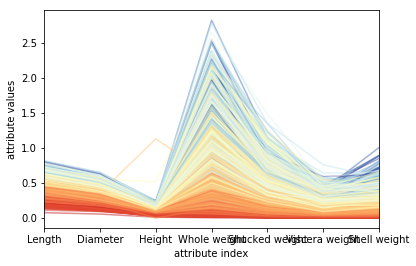

In [5]:
# we can also normalize the data using logit transform
meanrings = summary.iloc[1,7]
sdrings = summary.iloc[2,7]
for i in range(nrows):
    datarow = abalone.iloc[i,1:8]
    normTarget = (abalone.iloc[i,8]-meanrings)/(sdrings)
    labelColor = 1.0/(1.0+exp(-normTarget))
    datarow.plot(color=plot.cm.RdYlBu(labelColor),alpha = 0.5)
plot.xlabel("attribute index")
plot.ylabel("attribute values")
plot.show()

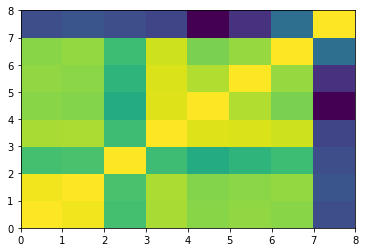

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

In [7]:
# draw the correlation heat map
from pandas import DataFrame
corMat = DataFrame(abalone.iloc[:,1:9].corr())
plot.pcolor(corMat)
plot.show()
print(corMat)
